In [1]:
import pandas as pd 

# This script reads a CSV file, prints the first 5 rows, shape, columns, data types, and missing values of the dataframe.
# It uses the pandas library to handle the data and the latin1 encoding to read the file.
# The script is useful for data exploration and understanding the structure of the dataset before performing any analysis or cleaning.

In [2]:
df = pd.read_csv("DATASET.csv", encoding = "latin1")
print("First 5 rows : \n", df.head()) # prints the first 5 rows
print("\nShape:", df.shape) #prints the shape of the dataframe
print("\nColumns:\n", df.columns)# prints the columns of the dataframe
print("\nData Types:\n", df.dtypes) # prints the data types of the columns
print("\nMissing Values:\n", df.isnull().sum())# prints the missing values in the dataframe and .sum() gives the sum of missing values

First 5 rows : 
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0  

#Data_loding_is_done

In [3]:
#Data Cleaning
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [ ]:
df = df.drop_duplicates() # remove duplicates
make sure thre are no duplicates

In [ ]:
print("\nAfter removing duplicates, the shape of the dataframe is:", df.shape) # prints the shape of the dataframe after removing duplicates


After removing duplicates, the shape of the dataframe is: (9994, 21)


use this if there are missing values in case

df = df.dropna() # remove missing values

NOW
Feature Engineering for Sales Insights
## 🧠 Creating New Analytical Columns (Shipping Time, Revenue, Profit Margin)



In [ ]:
df["Renuve after discount"] = df["Sales"] *(1 - df["Discount"])
df["Order Month "]= df["Order Date"].dt.to_period("M")
df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
df["Profit Margin (%)"] = (df["Profit"] / df["Sales"]) * 100

now the plot Part 
we use these to liberaries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

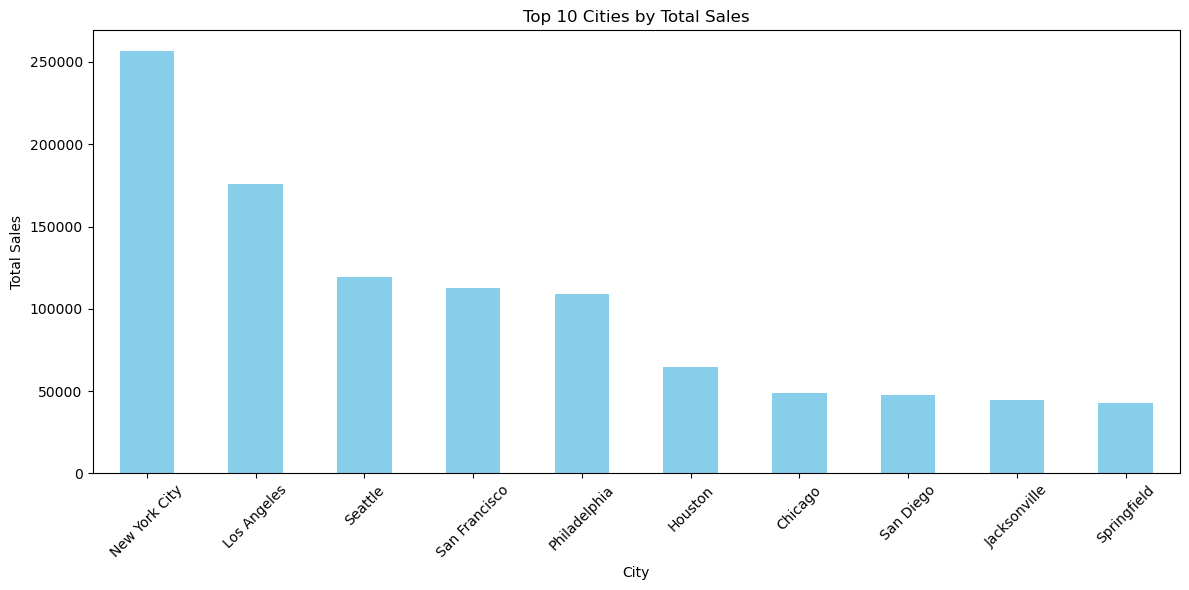

In [9]:
# Set the style of seaborn
plt.figure(figsize=(12,6))
# 1. Top 10 Cities by Sales
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


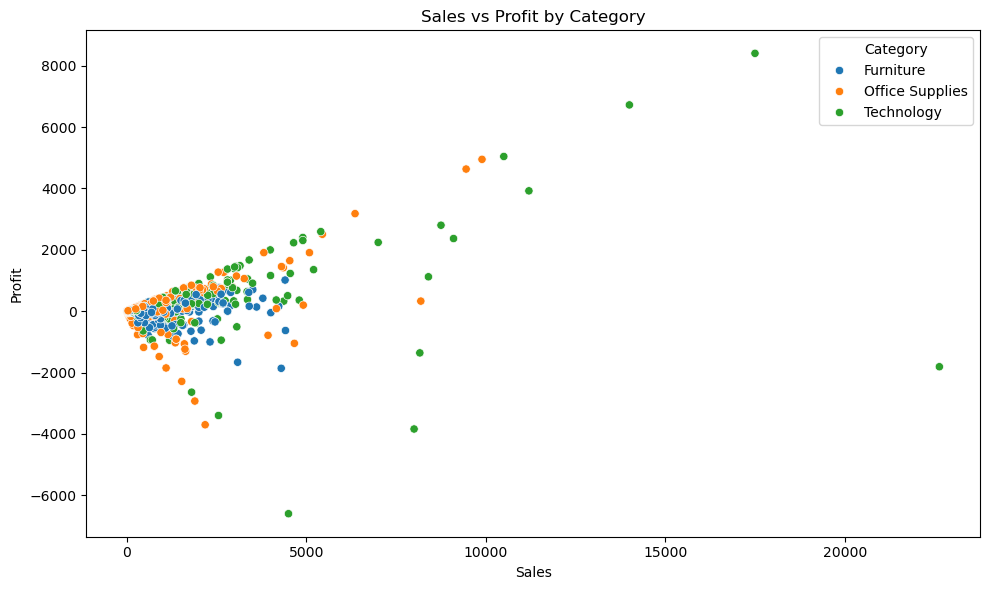

In [10]:
# 2. Sales vs Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Category")
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

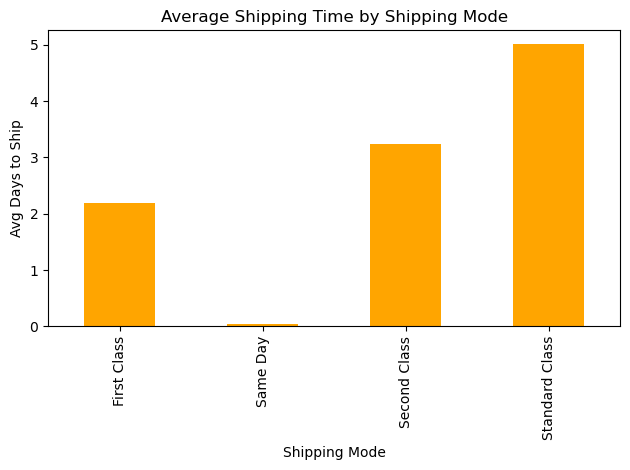

In [11]:
# 3. Average Shipping Time per Ship Mode
avg_ship_time = df.groupby("Ship Mode")["Shipping Time"].mean()
avg_ship_time.plot(kind="bar", color="orange")
plt.title("Average Shipping Time by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Avg Days to Ship")
plt.tight_layout()
plt.show()


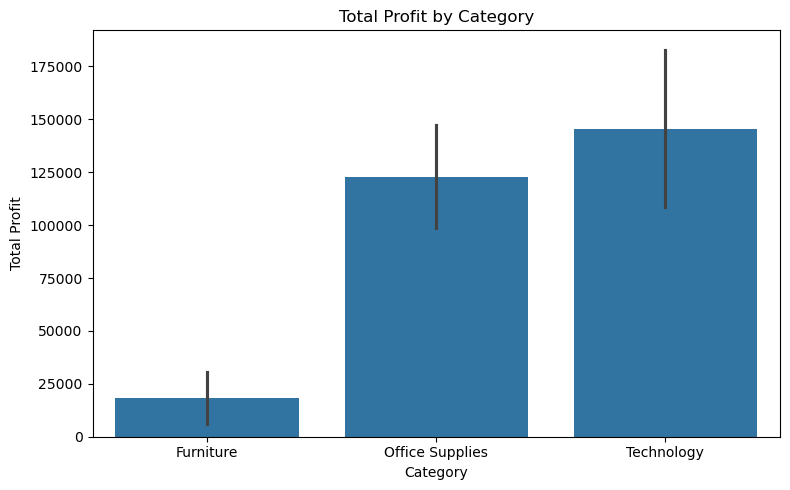

In [12]:
# 4. Profit by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Category", y="Profit", estimator=sum)
plt.title("Total Profit by Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

In [20]:
# 1. Group by Customer Name and sum the Sales
top_customers = df.groupby("Customer Name")["Sales"].sum()

# 2. Sort the customers by Sales in descending order
top_customers = top_customers.sort_values(ascending=False)

# 3. Select the Top 10 customers
top_10_customers = top_customers.head(10)
print("\nTop 10 Customers by Sales:\n", top_10_customers)


Top 10 Customers by Sales:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


<Axes: xlabel='Customer Name'>

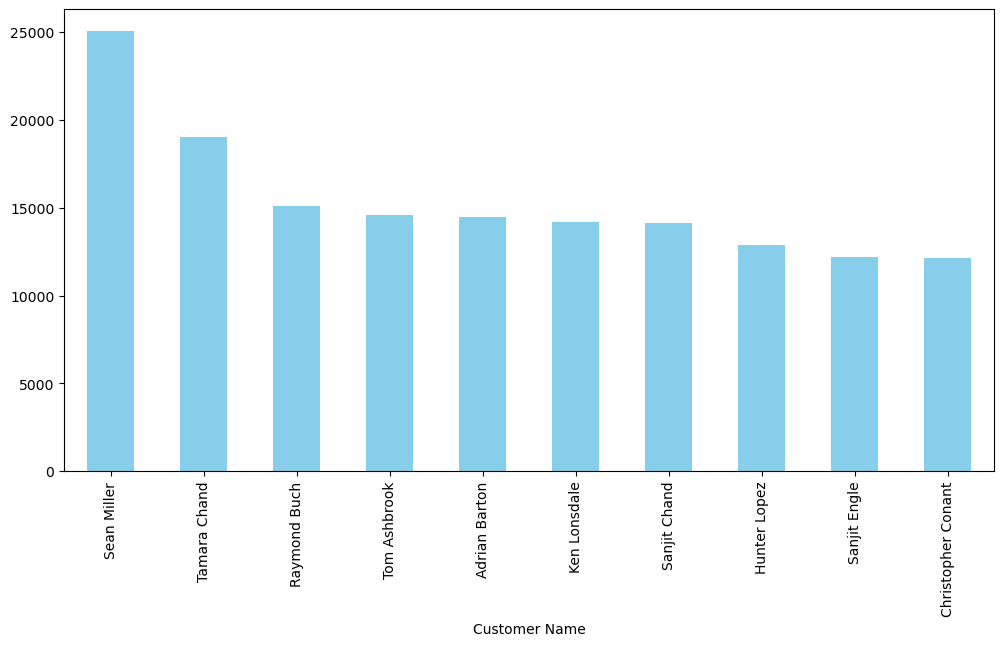

In [14]:
# 4. Plotting
plt.figure(figsize=(12,6))
top_10_customers.plot(kind='bar', color='skyblue')

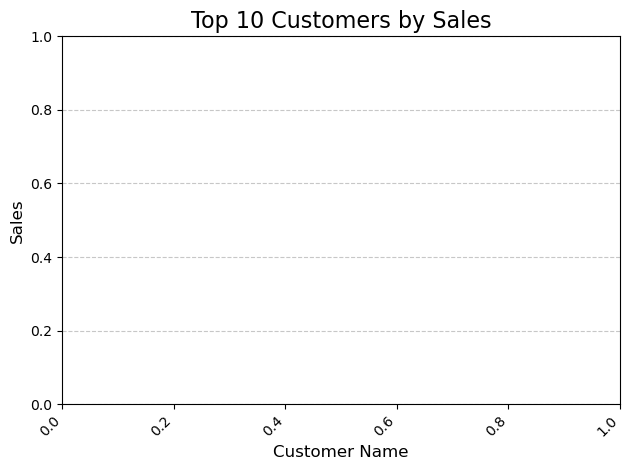

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Renuve after discount', 'Order Month ', 'Shipping Time',
       'Profit Margin (%)'],
      dtype='object')


In [ ]:
plt.title("Top 10 Customers by Sales", fontsize=16)
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')  # rotate labels for better readability
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print(df.columns)

In [22]:
# Group sales by month
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()

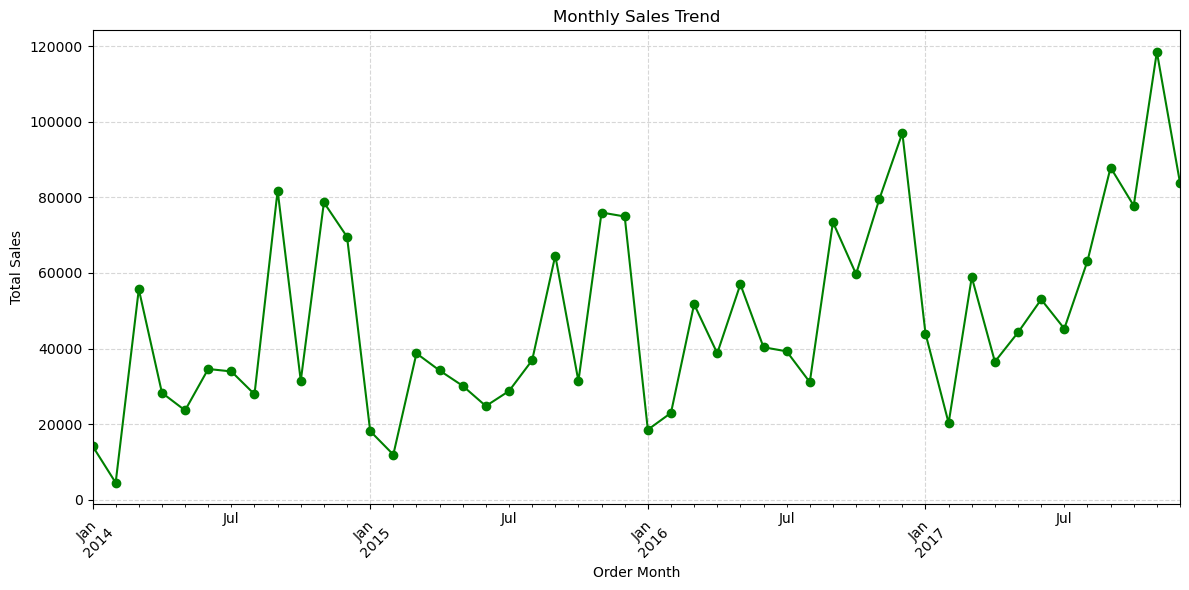

In [25]:
# Plotting
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Group by Month and Category
category_monthly_sales = df.groupby([df["Order Date"].dt.to_period("M"), "Category"])["Sales"].sum().unstack()

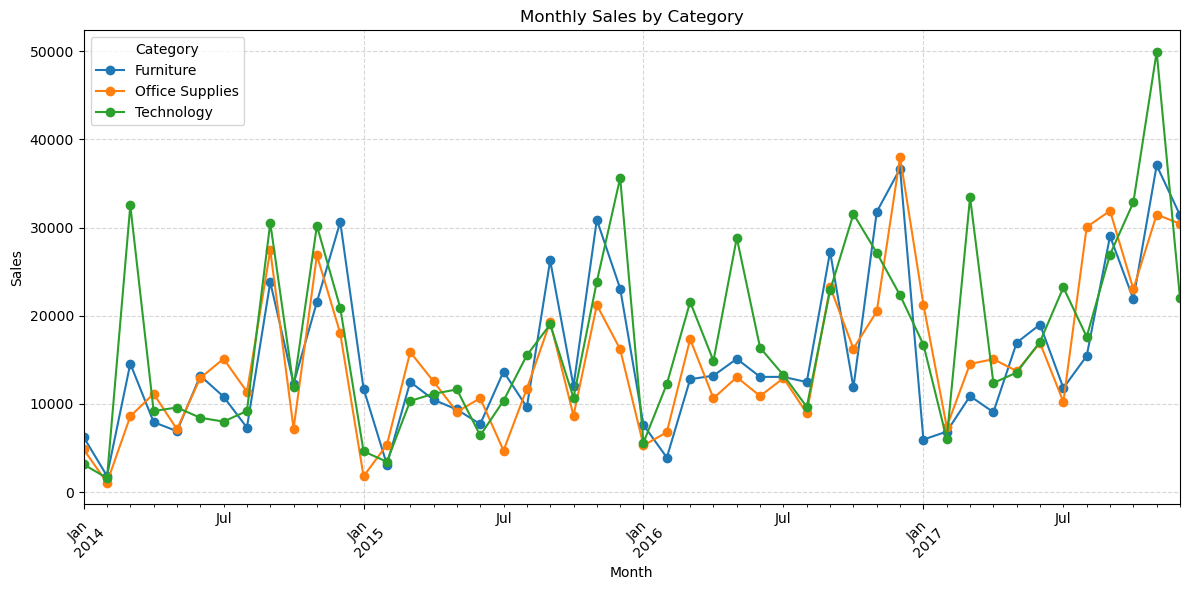

In [27]:
# Plot
category_monthly_sales.plot(figsize=(12,6), marker='o')
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

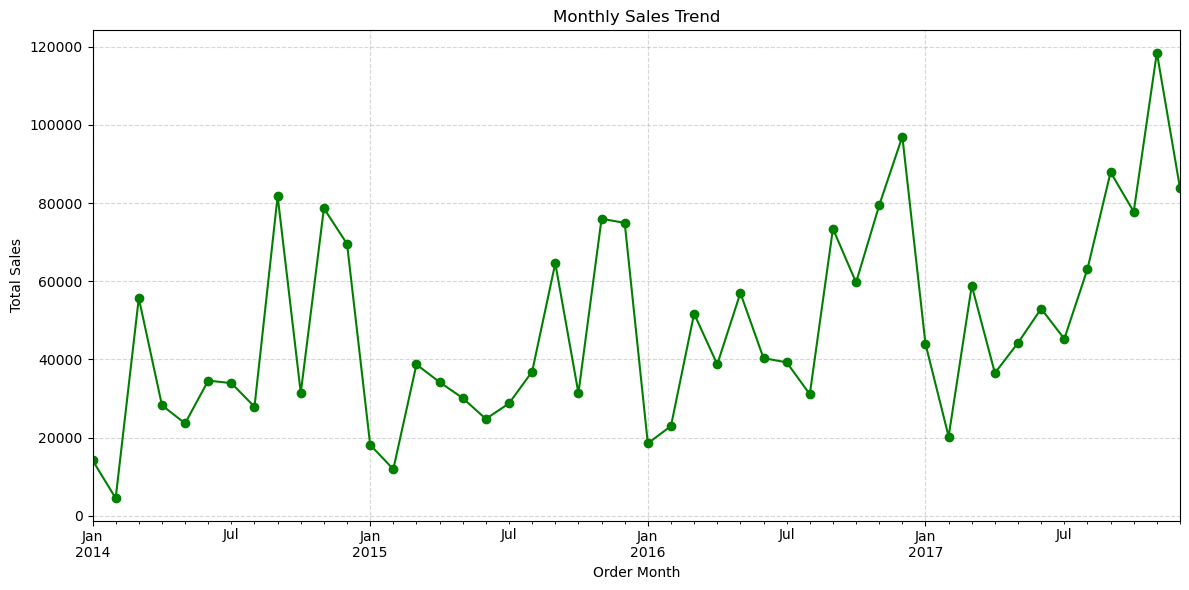

In [28]:
# 6. Monthly Sales Trend
monthly_sales = df.groupby("Order Month ")["Sales"].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

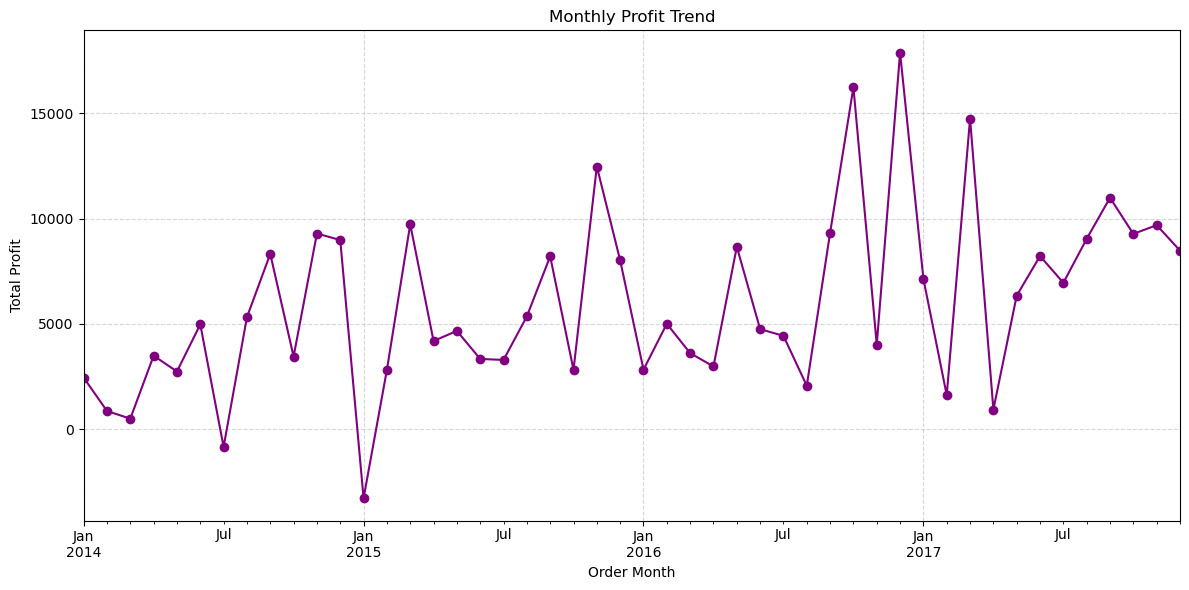

In [ ]:
# 7. Monthly Profit Trend
monthly_profit = df.groupby("Order Month ")["Profit"].sum()

plt.figure(figsize=(12, 6))
monthly_profit.plot(kind="line", marker='o', color='purple')
plt.title("Monthly Profit Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Profit")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [30]:
# Grouping by Category and summing Sales & Profit
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)

<Figure size 1000x600 with 0 Axes>

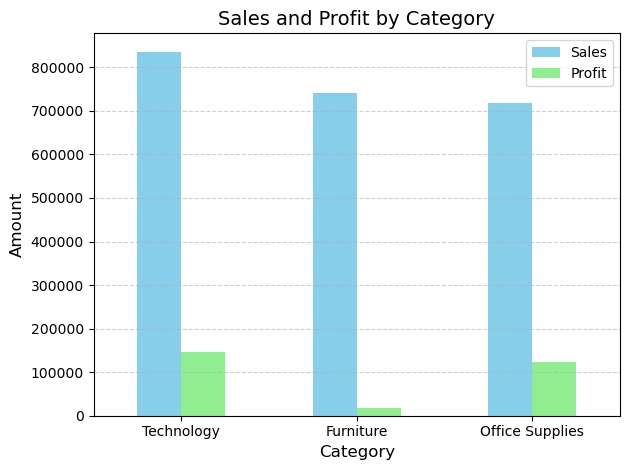

In [31]:
# Plotting
plt.figure(figsize=(10,6))
category_summary.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title("Sales and Profit by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# s

In [34]:
# s
df.to_csv("cleaned_sales_data.csv", index=False)
top_cities.to_csv("top_cities_sales.csv")
monthly_sales.to_csv("monthly_sales.csv")
category_summary.to_csv("sales_profit_by_category.csv")